## Pregunta 6

In [25]:
import numpy as np
import camb
import matplotlib.pyplot as plt

In [26]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
pars.set_matter_power(redshifts=[0], kmax=10)
results = camb.get_results(pars)

In [27]:
trans = results.get_matter_transfer_data()
kh = trans.transfer_data[0,:,0]

In [28]:
## Cheking the effect of out transfer function on primordial power spectrum

k = kh* results.Params.h
transfer = trans.transfer_data[6,:,0]
primordial_pk = results.Params.scalar_power(k)
matter_power = primordial_pk * transfer**2 * k**4/(k**3/(2*np.pi**2))

Text(0, 0.5, '$\\mathcal{R}(k)$')

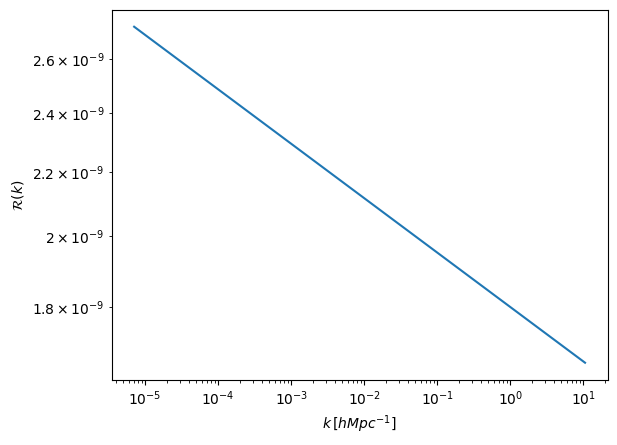

In [33]:
plt.loglog(k, primordial_pk)
plt.xlabel(r'$k\, [h Mpc^{-1}]$');
plt.ylabel(r'$\mathcal{R}(k)$')

Text(0, 0.5, '$\\mathcal{P}_{m}(k)$')

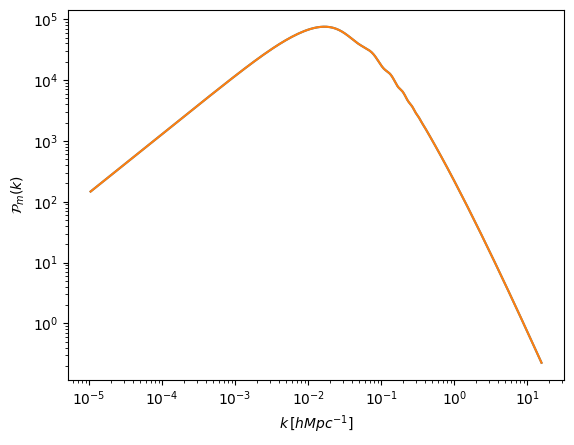

In [35]:
kh2, zs, Pk = results.get_linear_matter_power_spectrum(hubble_units=False)

plt.loglog(kh, matter_power)
plt.loglog(kh, Pk[0,:])
plt.xlabel(r'$k\, [h Mpc^{-1}]$');
plt.ylabel(r'$\mathcal{P}_{m}(k)$')

